In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data =  pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv') 

In [3]:
data = data[['engine_displacement',
'horsepower',
'vehicle_weight',
'model_year',
'fuel_efficiency_mpg']]

In [4]:
data.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

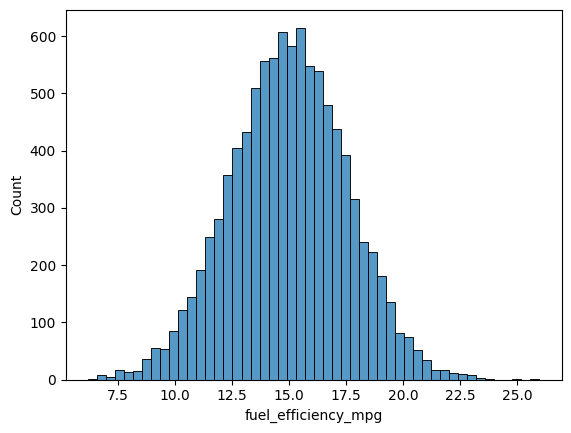

In [5]:
sns.histplot(data.fuel_efficiency_mpg, bins=50)

In [6]:
data.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [7]:
data.describe()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
count,9704.000000,8996.000000,9704.000000,9704.000000,9704.000000
mean,199.708368,149.657292,3001.280993,2011.484027,14.985243
std,49.455319,29.879555,497.894860,6.659808,2.556468
min,10.000000,37.000000,952.681761,2000.000000,6.200971
25%,170.000000,130.000000,2666.248985,2006.000000,13.267459
50%,200.000000,149.000000,2993.226296,2012.000000,15.006037
75%,230.000000,170.000000,3334.957039,2017.000000,16.707965
max,380.000000,271.000000,4739.077089,2023.000000,25.967222


In [8]:
data['model_age'] = max(data.model_year) - data.model_year
data.drop(columns=['model_year'], inplace=True)

In [8]:
n = len(data)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [9]:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)
data_train = data.iloc[idx[:n_train]].reset_index(drop=True)
data_val = data.iloc[idx[n_train:n_train+n_val]].reset_index(drop=True)
data_test = data.iloc[idx[n_train+n_val:]].reset_index(drop=True)

In [10]:
y_train = data_train.fuel_efficiency_mpg.values
y_val = data_val.fuel_efficiency_mpg.values
y_test = data_test.fuel_efficiency_mpg.values
del data_train['fuel_efficiency_mpg']
del data_val['fuel_efficiency_mpg']
del data_test['fuel_efficiency_mpg']

In [11]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [12]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [13]:
data_train_na_zeros = data_train.fillna(0).values

In [14]:
w0, w = train_linear_regression(data_train_na_zeros, y_train)
print(w0, w)
y_pred = w0 + data_train_na_zeros.dot(w)

28.827365475106156 [ 9.93613218e-05  3.54221891e-03 -5.01328015e-03  3.42992869e-04]


In [15]:
print(round(rmse(y_train, y_pred), 2))

0.52


<Axes: ylabel='Count'>

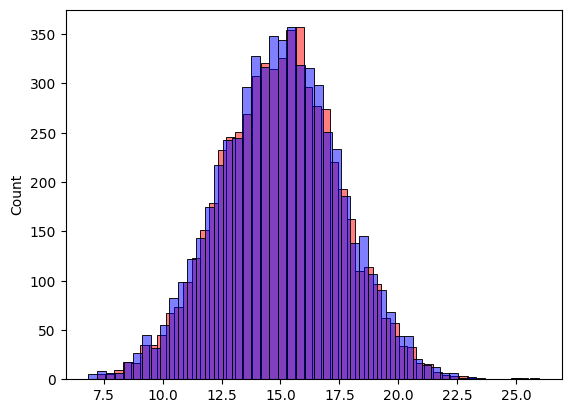

In [16]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

In [17]:
data_train_na_mean = data_train.fillna(np.mean(data.horsepower)).values

In [18]:
w0, w = train_linear_regression(data_train_na_zeros, y_train)
print(w0, w)
y_pred = w0 + data_train_na_mean.dot(w)
print(round(rmse(y_train, y_pred), 2))

28.827365475106156 [ 9.93613218e-05  3.54221891e-03 -5.01328015e-03  3.42992869e-04]
0.5


<Axes: ylabel='Count'>

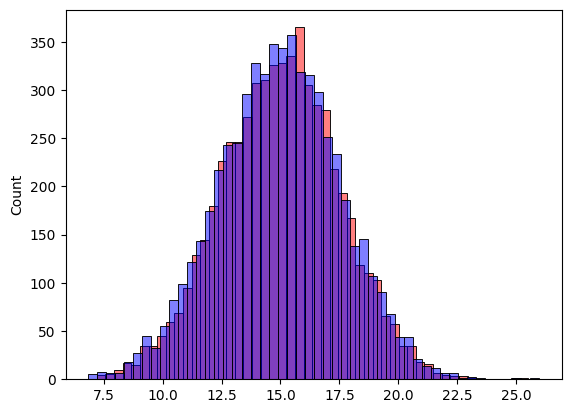

In [19]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

In [20]:
def train_linear_regression_reg(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [21]:
r_list = [0, 0.01, 0.1, 1, 5, 10, 100]
result = []
for r in r_list:
    w0, w = train_linear_regression_reg(data_train_na_zeros, y_train, r)
    y_pred = w0 + data_train_na_zeros.dot(w)
    result.append(round(rmse(y_train, y_pred), 2))
print(result)

[np.float64(0.52), np.float64(0.52), np.float64(0.52), np.float64(0.53), np.float64(0.53), np.float64(0.53), np.float64(0.53)]


In [39]:
seed_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
results = []
for s in seed_list:
    idx = np.arange(n)
    np.random.seed(s)
    np.random.shuffle(idx)
    data_train = data.iloc[idx[:n_train]].reset_index(drop=True)
    data_val = data.iloc[idx[n_train:n_train+n_val]].reset_index(drop=True)
    y_train = data_train.fuel_efficiency_mpg.values    
    y_val = data_val.fuel_efficiency_mpg.values
    del data_train['fuel_efficiency_mpg']
    del data_val['fuel_efficiency_mpg']
    data_train_na_zeros = data_train.fillna(0).values
    data_val_na_zeros = data_val.fillna(0).values
    w0, w = train_linear_regression(data_train_na_zeros, y_train)
    y_pred = w0 + data_val.dot(w)
    results.append(rmse(y_val, y_pred))
print(round(np.std(results), 3))

0.006


In [25]:
n = len(data)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)
data_train = data.iloc[idx[:n_train]].reset_index(drop=True)
data_val = data.iloc[idx[n_train:n_train+n_val]].reset_index(drop=True)
data_test = data.iloc[idx[n_train+n_val:]].reset_index(drop=True)

y_train = data_train.fuel_efficiency_mpg.values
y_val = data_val.fuel_efficiency_mpg.values
y_test = data_test.fuel_efficiency_mpg.values
del data_train['fuel_efficiency_mpg']
del data_val['fuel_efficiency_mpg']
del data_test['fuel_efficiency_mpg']

In [28]:
data_train_val = pd.concat([data_train, data_val]).reset_index(drop=True)
data_train_val = data_train_val.fillna(0).values
y_train_val = np.concat([y_train, y_val])

In [33]:
w0, w = train_linear_regression_reg(data_train_val, y_train_val, r=0.1)
y_pred = w0 + data_test.dot(w)
print(round(rmse(y_test, y_pred),2))

0.5
